In [1]:
#import libraries
import pandas as pd
# import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter

In [2]:
#import data and view
data_origin = pd.read_csv("../db/cordova_FeatureSet.csv", skipinitialspace=True)
data_origin

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,android.permission.ACCESS_Nandroid.intent.action.MAINETWORK_STATE,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_virustool = pd.read_csv("../db/data_virustool.csv", skipinitialspace=True)
data_virustool

,_id,apk_name,package_name,ml_permission,ml_origin,ml_plugin,ml_virus,malicious,undetected,malware
0,{'$oid': '6080b68132fda25f88a14613'},Bau Magazine_1.3.2.apk,at.wohnnet.kiosk.android,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
1,{'$oid': '6080b68132fda25f88a14614'},BorusanPortMobile_1.1.apk,app.id_df3851c64dc64001a2ddc130894c2519,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
2,{'$oid': '6080b68132fda25f88a14615'},Camping Corones_0.1.apk,at.generalsolutions.contwise.maps.camping_corones,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
3,{'$oid': '6080b68132fda25f88a14616'},Camping Mals_0.0.24.apk,at.generalsolutions.contwise.maps.camping_mals,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
4,{'$oid': '6080b68132fda25f88a14617'},Contwise LISA_3.3.apk,at.generalsolutions.contwise.maps.bergrettung,"['android.permission.CAMERA', 'android.permiss...",[],[],[],0,0,0
...,...,...,...,...,...,...,...,...,...,...
3141,{'$oid': '6080b68232fda25f88a15258'},com.frontera.puntaarenas2.apk,com.frontera.puntaarenas2,"['android.permission.ACCESS_COARSE_LOCATION', ...","['origin~~http://127.0.0.1*', 'origin~~*.*']","['App', 'org.apache.cordova.App', 'Geolocation...",[],0,0,0
3142,{'$oid': '6080b68232fda25f88a15259'},off.guide.maps.thailand.apk,off.guide.maps.thailand,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0
3143,{'$oid': '6080b68232fda25f88a1525a'},off.guide.maps.mexico.apk,off.guide.maps.mexico,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0
3144,{'$oid': '6080b68232fda25f88a1525b'},off.guide.maps.india.apk,off.guide.maps.india,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0


# Data Preprocessing

## Combine Dataset

In [4]:
df = data_origin.copy()
df.head()

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,android.permission.ACCESS_Nandroid.intent.action.MAINETWORK_STATE,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_virustool["apk_name_filter"] = data_virustool["apk_name"].apply(lambda x: x[:-4])
data_virustool

,_id,apk_name,package_name,ml_permission,ml_origin,ml_plugin,ml_virus,malicious,undetected,malware,apk_name_filter
0,{'$oid': '6080b68132fda25f88a14613'},Bau Magazine_1.3.2.apk,at.wohnnet.kiosk.android,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,Bau Magazine_1.3.2
1,{'$oid': '6080b68132fda25f88a14614'},BorusanPortMobile_1.1.apk,app.id_df3851c64dc64001a2ddc130894c2519,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,BorusanPortMobile_1.1
2,{'$oid': '6080b68132fda25f88a14615'},Camping Corones_0.1.apk,at.generalsolutions.contwise.maps.camping_corones,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,Camping Corones_0.1
3,{'$oid': '6080b68132fda25f88a14616'},Camping Mals_0.0.24.apk,at.generalsolutions.contwise.maps.camping_mals,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,Camping Mals_0.0.24
4,{'$oid': '6080b68132fda25f88a14617'},Contwise LISA_3.3.apk,at.generalsolutions.contwise.maps.bergrettung,"['android.permission.CAMERA', 'android.permiss...",[],[],[],0,0,0,Contwise LISA_3.3
...,...,...,...,...,...,...,...,...,...,...,...
3141,{'$oid': '6080b68232fda25f88a15258'},com.frontera.puntaarenas2.apk,com.frontera.puntaarenas2,"['android.permission.ACCESS_COARSE_LOCATION', ...","['origin~~http://127.0.0.1*', 'origin~~*.*']","['App', 'org.apache.cordova.App', 'Geolocation...",[],0,0,0,com.frontera.puntaarenas2
3142,{'$oid': '6080b68232fda25f88a15259'},off.guide.maps.thailand.apk,off.guide.maps.thailand,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0,off.guide.maps.thailand
3143,{'$oid': '6080b68232fda25f88a1525a'},off.guide.maps.mexico.apk,off.guide.maps.mexico,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0,off.guide.maps.mexico
3144,{'$oid': '6080b68232fda25f88a1525b'},off.guide.maps.india.apk,off.guide.maps.india,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0,off.guide.maps.india


In [6]:
# targets = ["malicious", "undetected", "malware"]
# for t in targets:
#     df[t] = df["apk_name"].map(data_virustool.set_index("apk_name_filter")[t])

In [7]:
df["class"] = df["apk_name"].map(data_virustool.set_index("apk_name_filter")["malware"])
df

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [8]:
df = df[df['class'].notna()]
df

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [9]:
df["class"] = df["class"].astype(int)
df

<ipython-input-9-e601089f0356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"] = df["class"].astype(int)


,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#check null value
data_origin.isnull().sum(axis = 0)

apk_name                                         0
u_battery-status                                 0
u_camera                                         0
u_contacts                                       0
u_device                                         0
                                                ..
com.android.email.permission.READ_ATTACHMENT     0
uk.org.sas.sewagealert.permission.C2D_MESSAGE    0
wecotec.vfl1848_4.permission.C2D_MESSAGE         0
wtdt.resgrid.andriod.permission.C2D_MESSAGE      0
yonatan.benmoshe.permission.C2D_MESSAGE          0
Length: 905, dtype: int64

In [11]:
#display the columns with the '?'
for i in df.columns:
    if '?' in df[i].unique().astype(str):
        print(i)
        print(df[i].value_counts())
        print('\n')

In [12]:
from collections import Counter
Counter(df['class'])

Counter({1: 964, 0: 1694})

In [13]:
df_pro = df.drop(columns=["apk_name"])
df_pro

,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,u_media,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2655,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2656,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2657,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Different Feature Set

In [14]:
# df_pro = df.iloc[: , 14:]
# df_pro

# Model

In [15]:
# import model training class from data_scikit_cv
from data_scikit_cv import ModelsTraining 
df_models = ModelsTraining(df_pro, 'class')

10-fold Cross Validation


======================================== 1/6 Naive Bayesian ========================================
Training model...

accuracy_scores:
 [0.65258216 0.63380282 0.63849765 0.63849765 0.64319249 0.63380282
 0.63679245 0.62735849 0.64150943 0.64150943]
f1_scores:
 [0.11904762 0.04878049 0.04938272 0.04938272 0.0952381  0.04878049
 0.04938272 0.02469136 0.07317073 0.05      ]
The mean accuracy: 0.639
The mean f1 score: 0.061


              precision    recall  f1-score   support

           0       0.99      0.67      0.80       521
           1       0.04      0.64      0.07        11

    accuracy                           0.67       532
   macro avg       0.51      0.65      0.43       532
weighted avg       0.97      0.67      0.78       532



=================================== 2/6 Decision Tree Classifier ===================================
Training model...

accuracy_scores:
 [0.71830986 0.71361502 0.72300469 0.71830986 0.74178404 0.76995305
 0.72641509

In [16]:
# Split data
X = df_models.X
y = df_models.y
X_test = df_models.X_test
y_test = df_models.y_test
y_pred_ls = df_models.y_pred_ls
model_ls = df_models.model_ls

# Result Visualization

## Consfusion Matrix for the Classifier 

<Figure size 360x360 with 0 Axes>

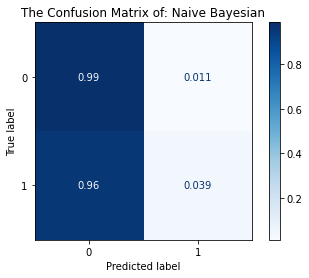

<Figure size 360x360 with 0 Axes>

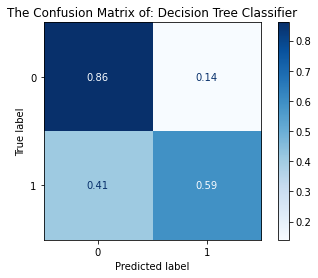

<Figure size 360x360 with 0 Axes>

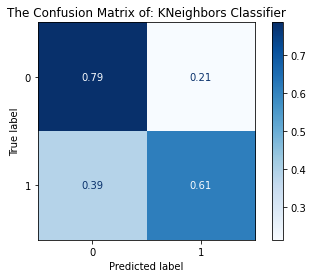

<Figure size 360x360 with 0 Axes>

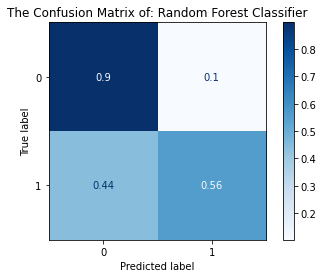

<Figure size 360x360 with 0 Axes>

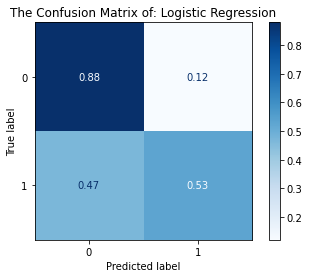

<Figure size 360x360 with 0 Axes>

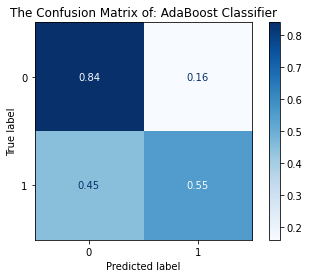

In [17]:
from sklearn.metrics import plot_confusion_matrix
for name, clf in model_ls.items():
#     print ("The Confusion Matrix of: ", name)
#     print (pd.DataFrame(confusion_matrix(y_test, y_pred)))
    plt.figure(figsize=(5,5))
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title("The Confusion Matrix of: %s" % name)
    plt.show()

In [18]:
# df_models.confusion_matrix_visualization()
accuracy_f1 = df_models.accuracy_f1()
accuracy_f1.style.background_gradient(cmap='Blues')

,ML Models,Accuracy,F1-score
0,Naive Bayesian,0.638755,0.060786
1,Decision Tree Classifier,0.738026,0.614575
2,KNeighbors Classifier,0.723886,0.615603
3,Random Forest Classifier,0.781955,0.635220
4,Logistic Regression,0.754004,0.626339
5,AdaBoost Classifier,0.748341,0.627853


## ROC Curve

In [19]:
# df_models.accuracy_f1()

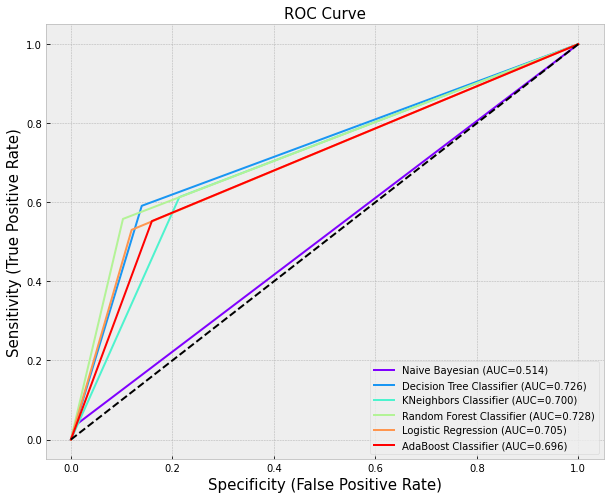

In [20]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from numpy import interp

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")
color = cm.rainbow(np.linspace(0, 1, len(model_ls)))
plt.title("ROC Curve", fontsize = 15)
plt.xlabel("Specificity (False Positive Rate)", fontsize = 15)
plt.ylabel("Sensitivity (True Positive Rate)", fontsize = 15)
labels = list()


# Plot ROC Curve
for c, (name, y_pred) in enumerate(y_pred_ls.items()):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color[c])
    labels.append('{} (AUC={:.3f})'.format(name, roc_auc))
  
plt.gca().legend(labels, loc='lower right', frameon=True)    
plt.plot([0,1],[0,1], linestyle='--', color='black')
plt.show()

## Learning Curve

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit

# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# for name, model in model_ls.items():
#     title = "Learning Curves for " + name
#     cv=None
# #     cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#     plot_learning_curve(model, title, X, y, ylim=(0.2, 1.01), n_jobs=4)
#     plt.show()